<a href="https://colab.research.google.com/github/vaidande/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_by_Ritik_Vaidande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

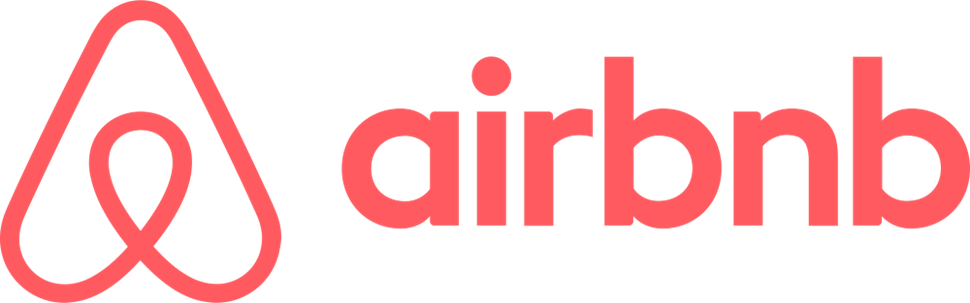

# Importing Libraries

In [ ]:
# Importing necessary libraries for analysing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading Dataset

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing dataset
data = pd.read_csv('/content/drive/MyDrive/Airbnb Booking Analysis - Ritik Vaidande/Airbnb NYC 2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Understanding Dataset

In [ ]:
# checking the shape of datset
data.shape

(48895, 16)

In [ ]:
# checking the feature names
list(data.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# checking for categorical columns
cat_cols = data.select_dtypes(include='object').columns
print(f'These are the categorical features in the dataset: {list(cat_cols)}')

These are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [ ]:
# checking for numeric columns
num_cols = data.select_dtypes(exclude='object').columns
print(f'These are the non-categorical features in the dataset: ')
list(num_cols)

These are the non-categorical features in the dataset: 


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Checking first 5 rows of the data
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the last 5 rows of the data
data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Data Wrangling and Cleaning

In [ ]:
# Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Checking for the null values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Filling missing values
data['name'].fillna('Absent', inplace = True)
data['host_name'].fillna('Absent', inplace = True)

In [ ]:
# Dropping the unncessary columns.
data = data.drop(['last_review'], axis = 1)
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# Checking for null values in the new dataset
print(f'There are no missing values after some data cleaning: ')
data.isnull().sum()

There are no missing values after some data cleaning: 


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# From this we can see the mean price to be around **152** dollars.
# Average availablity of an airbnb around a year is **112** days.

# Distribution

In [ ]:
numerical_data = data.select_dtypes(exclude='object').drop(['id', 'host_id'], axis = 1)

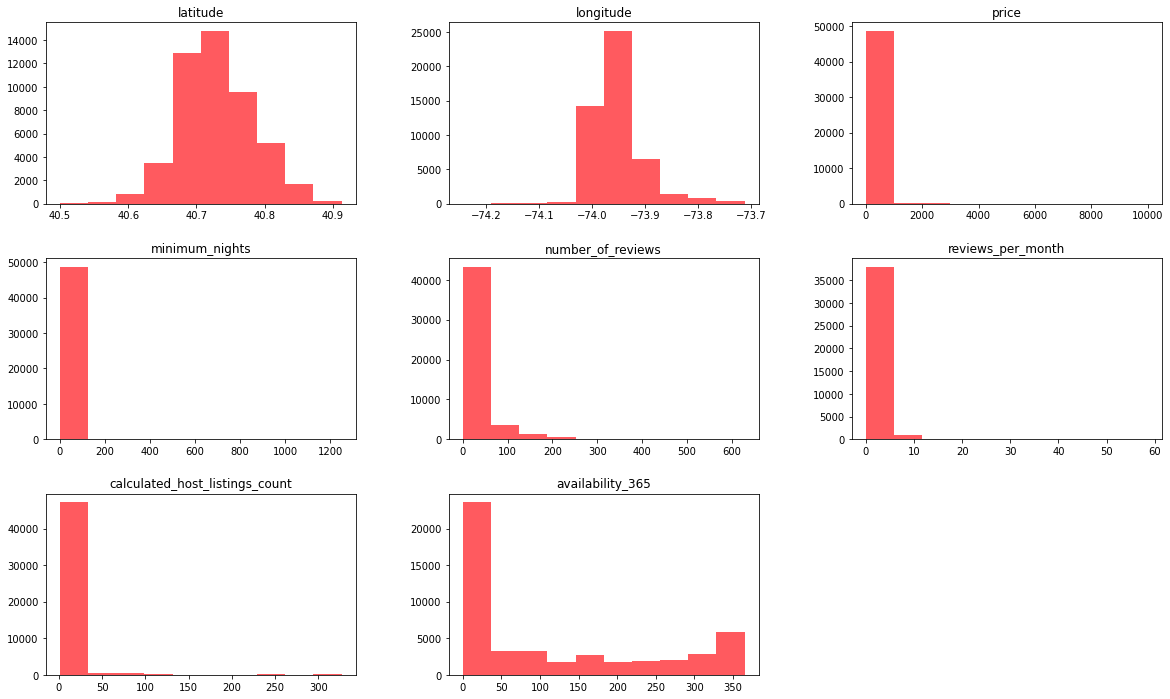

In [ ]:
# Viewing distribution of numeric data
dist= numerical_data.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

# From the numerical features present in the data, we have plotted the distribution plots of them and thus we can conclude that most of the data is **positively skewed** including price. Thus this leads us for checking the **outliers** in the data.

# Correlation Matrix

Text(0.5, 1.0, 'Correlation Plot')

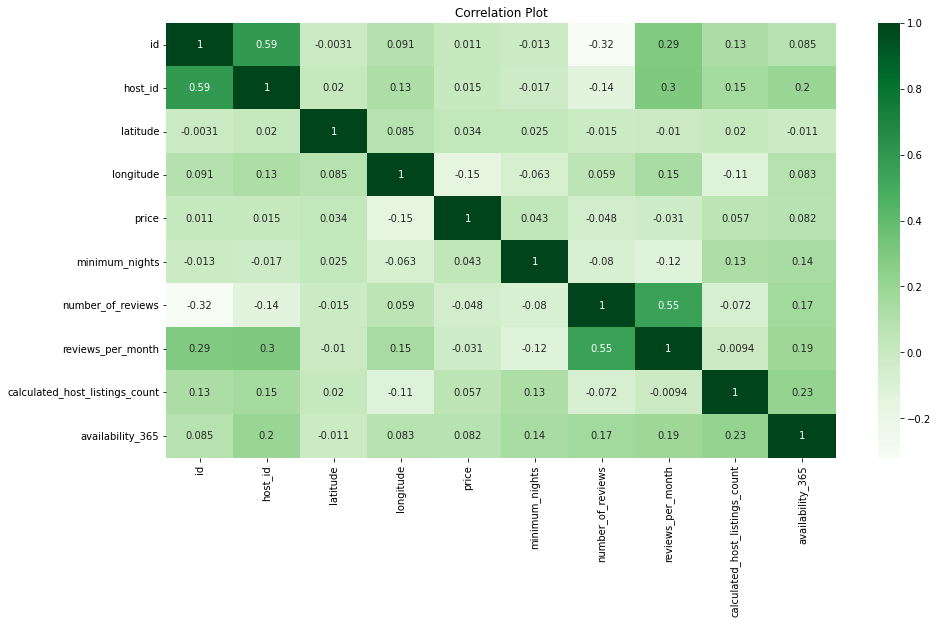

In [ ]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Plot')

# 'Price' has an very low correlation with other features. 'Number of reviews' and 'Reviews per month' are correlated, which is fair.

# *   What can we learn about different hosts and areas?

In [ ]:
# Let's see who has the most listings and in which neighbourhood.
top_hosts = data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index().sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
7483,Kazuya,Manhattan,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96
2905,Corporate Housing,Manhattan,91


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


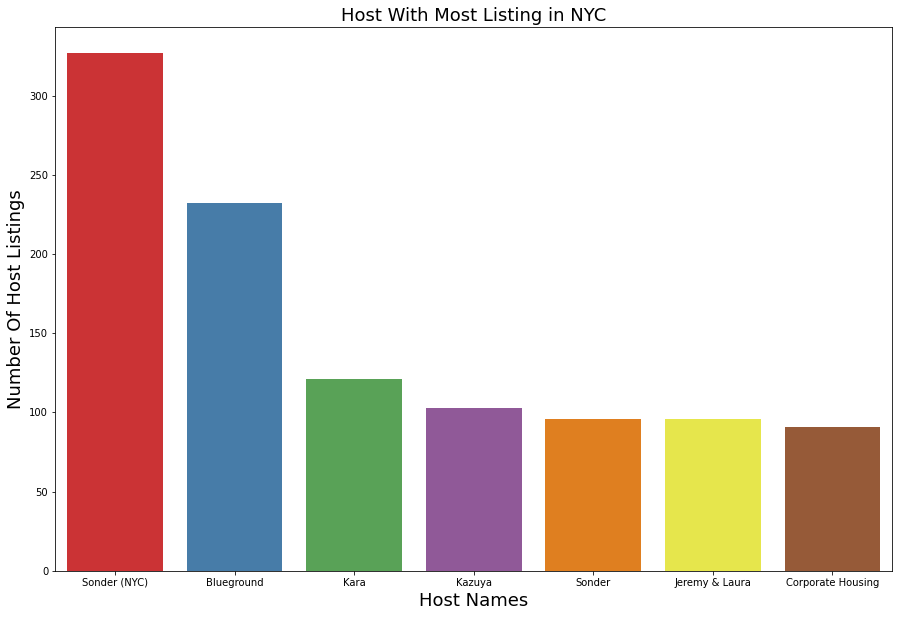

In [ ]:
# Visualizing the hosts with most listings.
host_name = top_hosts['host_name']
host_listing = top_hosts['calculated_host_listings_count']
plt.figure(figsize=(15,10))
sns.barplot(host_name, host_listing,palette='Set1')
plt.title('Host With Most Listing in NYC', fontsize=18)
plt.xlabel('Host Names', fontsize=18)
plt.ylabel('Number Of Host Listings', fontsize=18)
plt.show()

# **Sonder (NYC)** is the host name which has highest number of listings who has **327** listings in neighbourhood group **Manhattan**.

In [ ]:
# Number of Airbnb listed in each neighbourhood
top_neighbourhoods = data.groupby(['neighbourhood_group'])['id'].count().reset_index().sort_values(by = ['id'], ascending = False).rename(columns = {'id':'count'}).head(10)
top_neighbourhoods

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


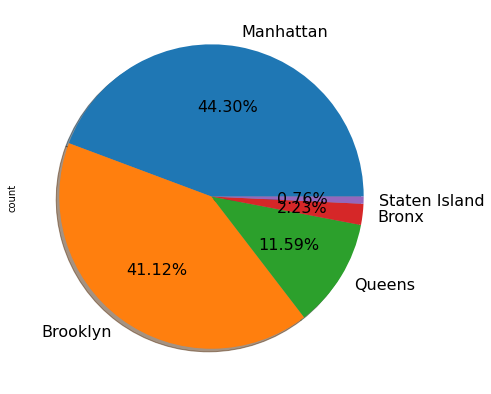

In [ ]:
# Visualizing the number of listings in each neighbourhood through pie chart
plt.figure(figsize=(7,7))
top_neighbourhoods['count'].plot(kind = 'pie', autopct='%0.2f%%', startangle=360, fontsize=16, shadow = True, labels = top_neighbourhoods['neighbourhood_group'])

# Observation - Majority of listings (Almost **85%**) are held in neighbourhood groups **Manhattan** and **Brooklyn**.

# *What can we learn about prices?

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

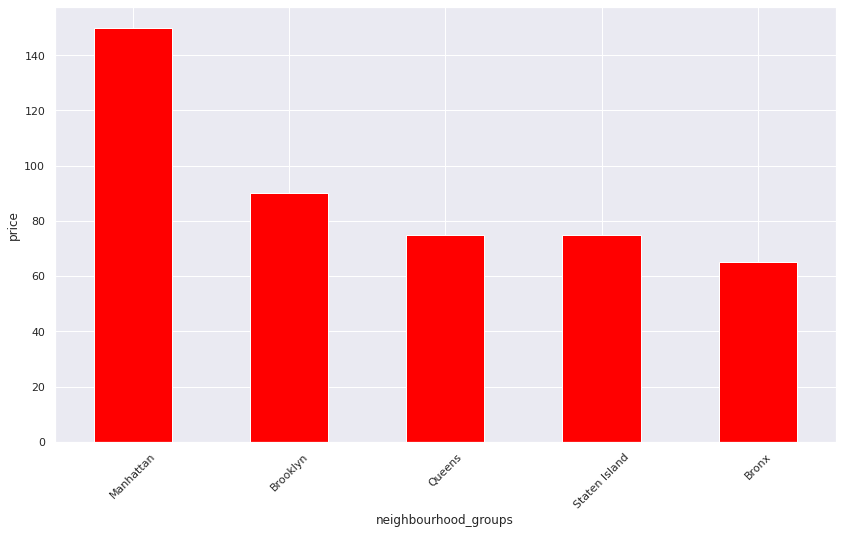

In [ ]:
# costliest neighbourhood groups
average_price = data.groupby(['neighbourhood_group'])['price'].median()
average_price.sort_values(ascending = False, inplace = True)
average_price.plot(kind = 'bar', color = 'red', width = 0.5, xlabel = 'neighbourhood_groups', ylabel = 'price')
plt.xticks(rotation=45)

# **Manhattan** is the costliest neighbourhood.
# **Staten Island** is not cheapest, though the number of listings were least.

In [ ]:
# Analysing Prices of airbnbs
price_range = data.price.value_counts().iloc[:10]

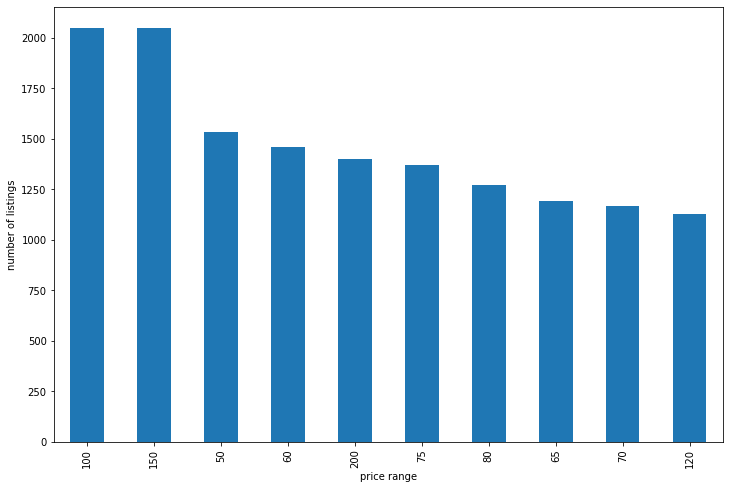

In [ ]:
# Plotting bar
plt.figure(figsize=(12, 8))
price_range.plot(kind = 'bar', xlabel = 'price range', ylabel = 'number of listings')

# Almost **2k+** airbnb's has price of **100** dollars and **150** dollars.
# **1.5k** airbnb's have around **50** dollars price.

In [ ]:
# Listing Price Info
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

# The average pricing is around **152** dollars.

# **50%** of data has price greater than **106** dollars.

# The costliest airbnb has around **10k** dollars as price.

In [ ]:
# Checking info for costliest airbnb
data[data['price'] == 10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,1,83


# We have **3** airbnbs with **10k** per night luxury stay, one private room and 2 home stay.

# *How price distribution is spread across the neighbouthood_groups?

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

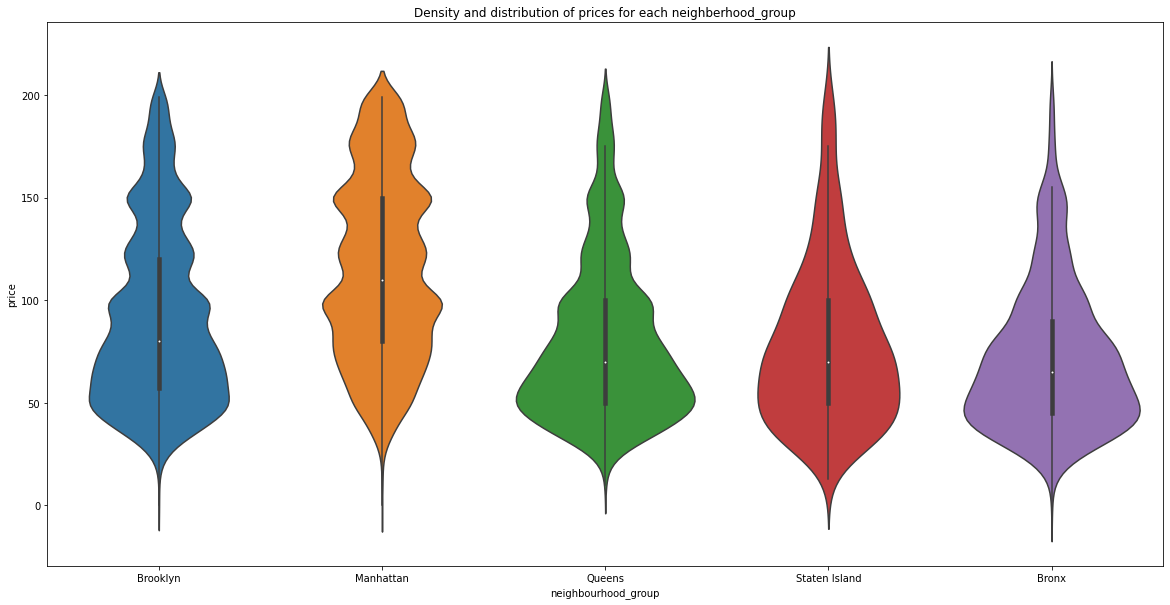

In [ ]:
plt.figure(figsize=(20,10))
v=sns.violinplot(data=data[data.price < 200], x='neighbourhood_group', y='price')
v.set_title('Density and distribution of prices for each neighberhood_group')

# **Manhattan** airbnb's has the highest average price. **Bronx** provides most number of budget friendly rooms.

# *Which are the hottest areas of transaction?

In [ ]:
# Exploring neighbourhoods..
data['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [ ]:
# Listing all neighbourhoods..
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

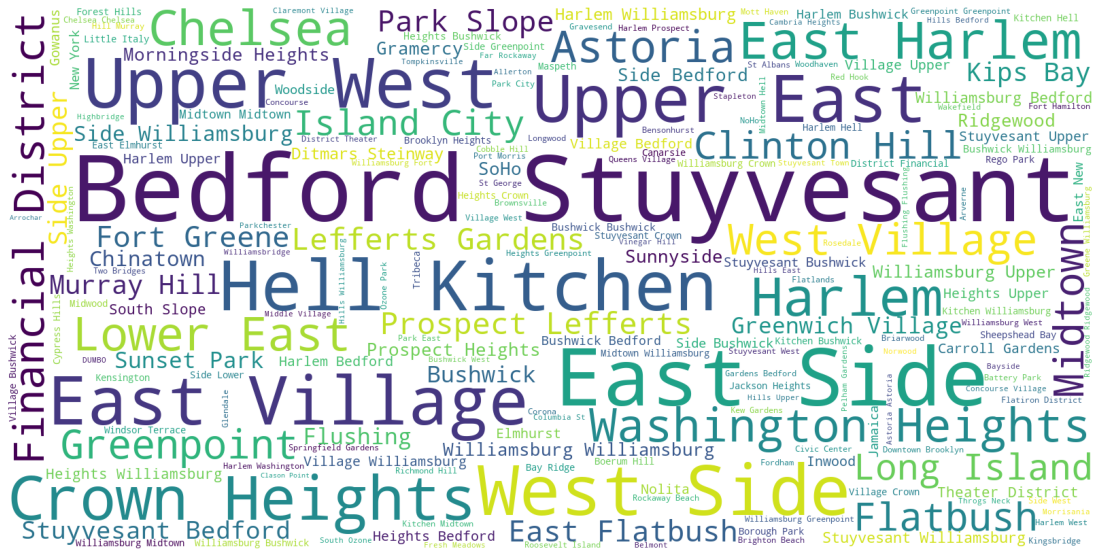

In [ ]:
# Using wordcloud to visualize hottest neighbourhoods.
wordcloud = WordCloud(background_color = 'white', width=1600, height=800).generate(" ".join(data['neighbourhood']))
plt.figure(figsize = (20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

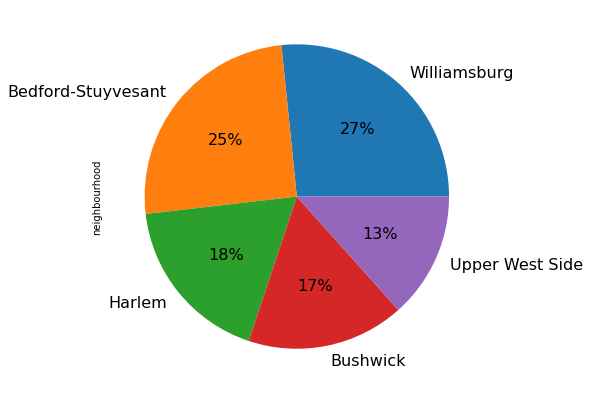

In [ ]:
#Visualizing it through pie chart
plt.figure(figsize=(7,7))
data['neighbourhood'].value_counts().iloc[:5].plot(kind = 'pie', autopct='%1.0f%%', startangle=360, fontsize=16)

# This pie-chart shows the top **5** areas by percentage in the dataset.
# We can see that **Williamsburg** is the hottest area of transaction followed by Bedford-Stuyvesant.

# *   How are the reviews compared to the listings?

In [ ]:
# Listing number of reviews per month the host gets.
data[data['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

# Around **130** airbnbs have **4** reviews per month, thus **222** have **3**, **406** have **2** and **178** have **1**.

In [ ]:
# Counting number of reviews
data['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

# **10k** airbnbs have **0** reviews

In [ ]:
# Checking for most reviewed airbnb
data['number_of_reviews'].value_counts(ascending = True)

341        1
607        1
395        1
467        1
335        1
       ...  
4       1994
3       2520
2       3465
1       5244
0      10052
Name: number_of_reviews, Length: 394, dtype: int64

# The most of reviewed airbnb is of **607** reviews.

In [ ]:
# Checking for info for most reviewed airbnb
data[data['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293


# Great Bedroom in **Manhattan** has the most number of reviews which cost **49** dollars.

In [ ]:
# Analysing number of reviews as per the neighbourhood group.
ng_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
ng_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


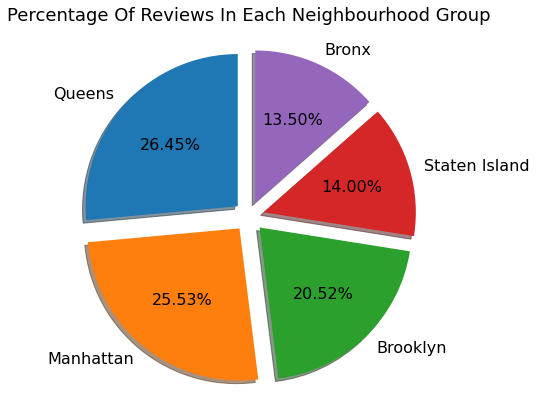

In [ ]:
# Plotting pie chart for number of reviews in each neighbourhood group
plt.figure(figsize=(10,7))
reviews = ng_reviews['number_of_reviews']
plt.pie(reviews, labels = ng_reviews['neighbourhood_group'], autopct = '%0.2f%%', startangle = 90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True, textprops={'fontsize': 16})
plt.title('Percentage Of Reviews In Each Neighbourhood Group', fontsize = 18)
plt.show()

# The above pie chart shows the share percentage of reviews for each neighbourhood group. More than **50%** of reviews are from **Queens** and **Manhattan**. Even though we saw the number of listings of Queens were less then half compared to Manhattan or Brooklyn, **Queens** has the most reviews than any another neighbourhood group. This shows that **Queens** is most likely to preferred by people.

## * Which hosts are the busiest and why?


In [ ]:
# Exploring neighbourhood group busiest hosts
busiest_hosts = data.groupby(['host_name','neighbourhood','neighbourhood_group'], sort=True)['host_id'].count().sort_values(ascending=False).head(10)
busiest_hosts.sort_values(inplace = True)
busiest_hosts

host_name     neighbourhood       neighbourhood_group
Melissa       Bedford-Stuyvesant  Brooklyn                39
Michael       Williamsburg        Brooklyn                41
Kara          Hell's Kitchen      Manhattan               41
Red Awning    Midtown             Manhattan               49
Stanley       Murray Hill         Manhattan               50
Sonder (NYC)  Murray Hill         Manhattan               50
Sonder        Financial District  Manhattan               51
Vida          Greenpoint          Brooklyn                52
John          Hell's Kitchen      Manhattan               55
Sonder (NYC)  Financial District  Manhattan              218
Name: host_id, dtype: int64

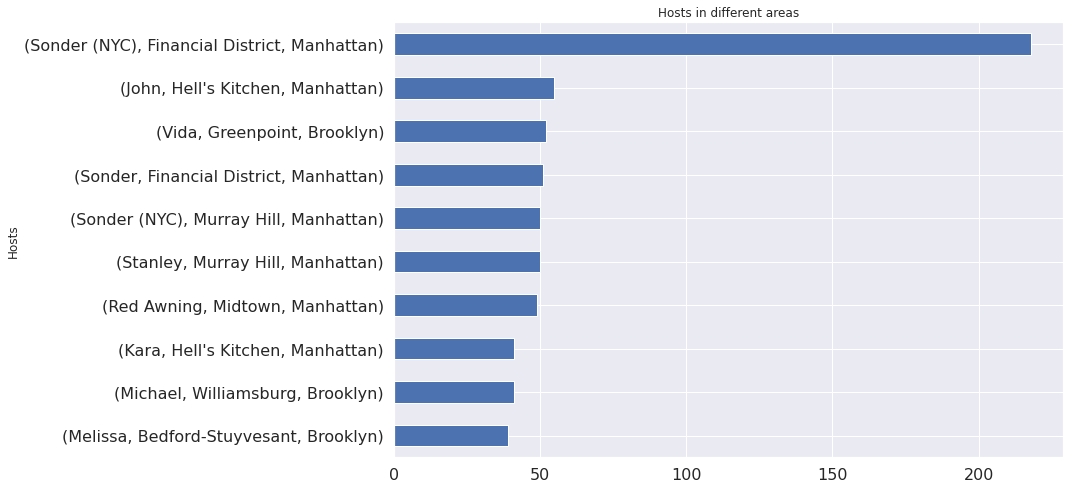

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Hosts in different areas")
busiest_hosts.plot(kind='barh', fontsize = 16, xlabel = 'Hosts', ylabel = 'Count')

# These are the top 10 busiest host among their respective neighbourhoods. **Financial District** is the busiest among all neighbourhood groups. Most busiest hosts are from **Manhattan** region.

# *What types of rooms are prefered by people respective to the regions?

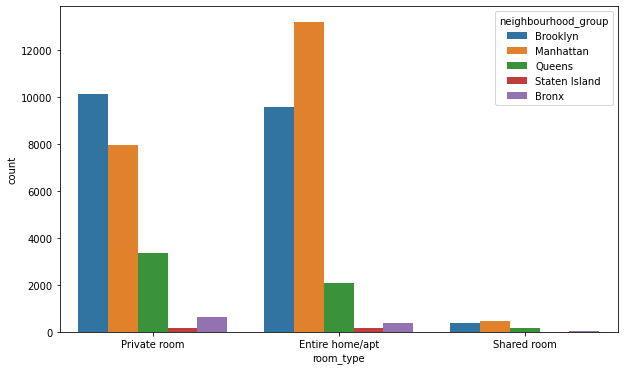

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'room_type', hue = 'neighbourhood_group')

# **Home service** seems to be most used by people and the highest in **Manhattan**. This is also the highest service used across New York City.

# In **Queens**, **Private rooms** were more used.

# *How room types are distributed among neighbourhood groups?

Text(0.5, 1.0, 'Location Co-ordinates')

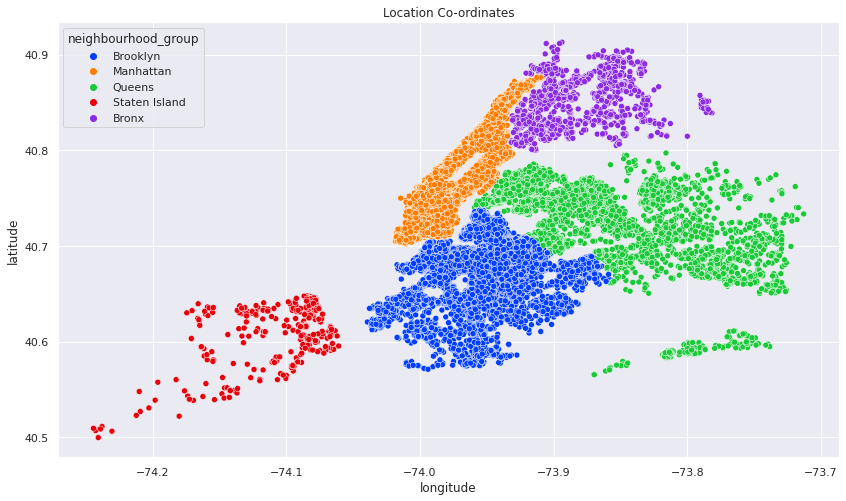

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(data=data, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC coordinates')

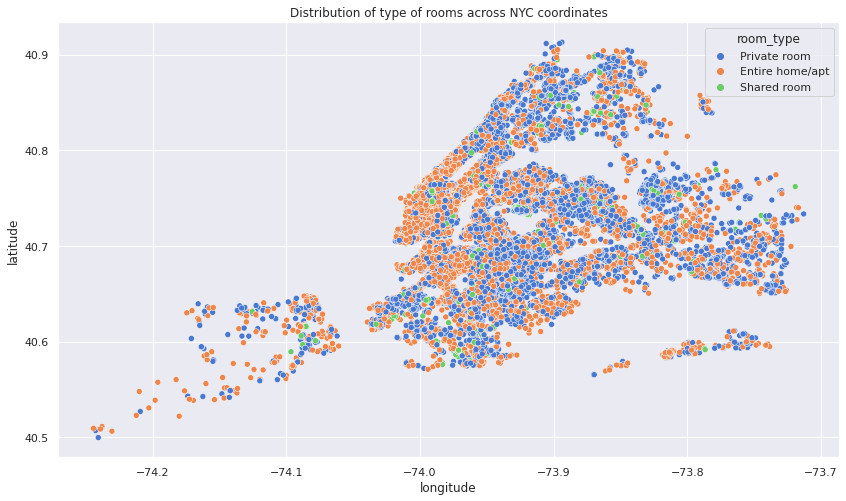

In [ ]:
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(x=data.longitude, y=data.latitude,hue=data.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC coordinates')

# By the above scatterplot of latitude vs longitude we can conclude that there's **Shared Room** listings throughout NYC are very less as compared to Private and Entire Home.
# **90%** of the listings on Airbnb are either **Private Room** or **Entire/Home**. Guests mostly have opted for **Private Room/Entire Room** as it's much easier for guests to stay in and rent on Airbnb.

# *What kind of distribution of available rooms throughout the year?

Text(0.5, 1.0, 'Rooms available throughout the year')

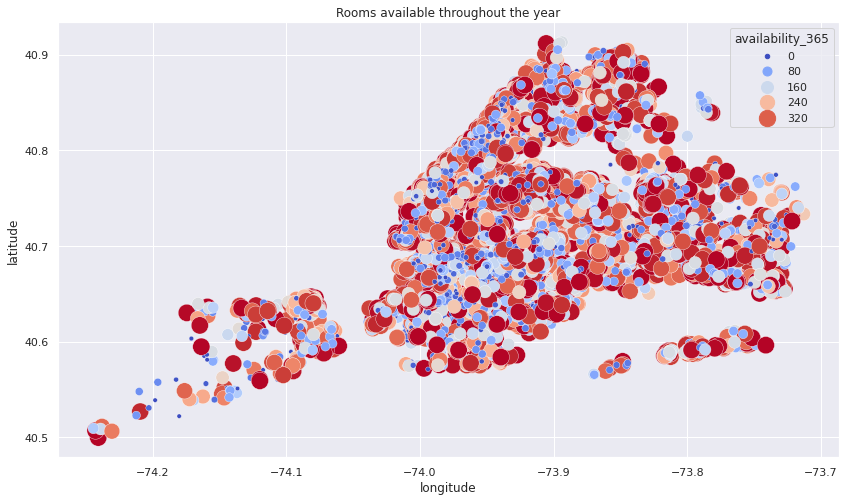

In [ ]:
plt.figure(figsize=(14, 8))
ax=sns.scatterplot(data=data,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365',sizes=(20,300))
ax.set_title('Rooms available throughout the year')

# As we discussed in previous analysis that **Bronx** and **Staten Island** listings are way **cheaper** than compared to others like **Manhattan** and **Queen**.

# The reason behind this can be explained through this scatterplot map.

# As you can see that **Staten Island** and **Bronx** listings are available throughout the year, now this might be case that they are way cheaper than other neighbourhood groups.

# *Which are the hottest areas of transaction?

In [ ]:
# Exploring neighbourhoods..
data['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [ ]:
# Listing all neighbourhoods..
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

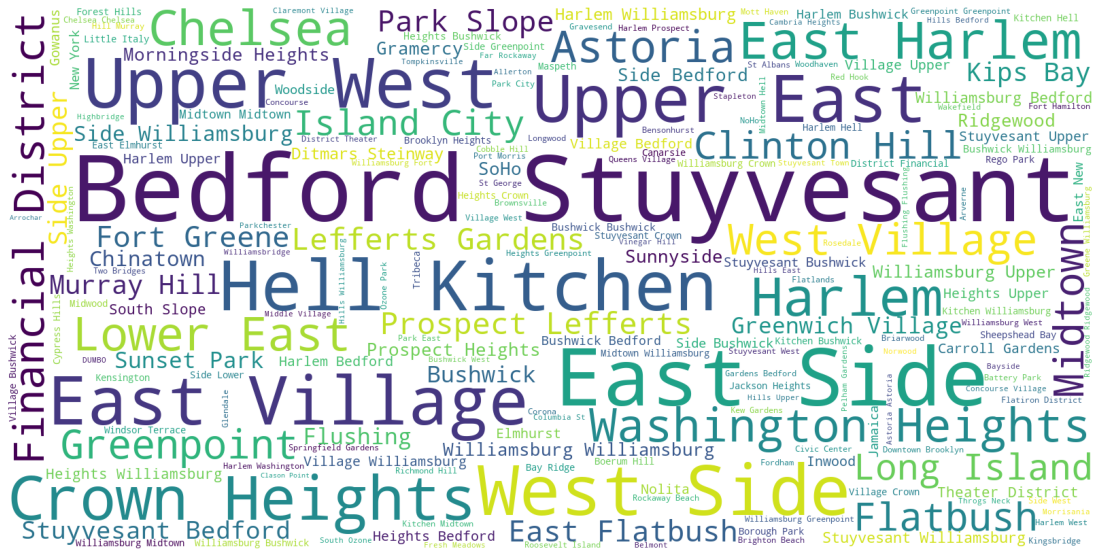

In [ ]:
# Using wordcloud to visualize hottest neighbourhoods.
wordcloud = WordCloud(background_color = 'white', width=1600, height=800).generate(" ".join(data['neighbourhood']))
plt.figure(figsize = (20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

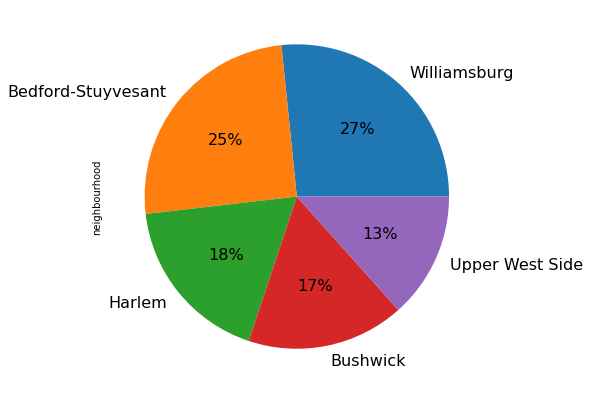

In [ ]:
#Visualizing it through pie chart
plt.figure(figsize=(7,7))
data['neighbourhood'].value_counts().iloc[:5].plot(kind = 'pie', autopct='%1.0f%%', startangle=360, fontsize=16)

# This pie-chart shows the top **5** areas by percentage in the dataset.
# We can see that **Williamsburg** is the hottest area of transaction followed by Bedford-Stuyvesant.

# *   How are the reviews compared to the listings?

In [ ]:
# Listing number of reviews per month the host gets.
data[data['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

# Around **130** airbnbs have **4** reviews per month, thus **222** have **3**, **406** have **2** and **178** have **1**.

In [ ]:
# Counting number of reviews
data['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

# **10k** airbnbs have **0** reviews

In [ ]:
# Checking for most reviewed airbnb
data['number_of_reviews'].value_counts(ascending = True)

341        1
607        1
395        1
467        1
335        1
       ...  
4       1994
3       2520
2       3465
1       5244
0      10052
Name: number_of_reviews, Length: 394, dtype: int64

# The most of reviewed airbnb is of **607** reviews.

In [ ]:
# Checking for info for most reviewed airbnb
data[data['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293


# Great Bedroom in **Manhattan** has the most number of reviews which cost **49** dollars.

In [ ]:
# Analysing number of reviews as per the neighbourhood group.
ng_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
ng_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


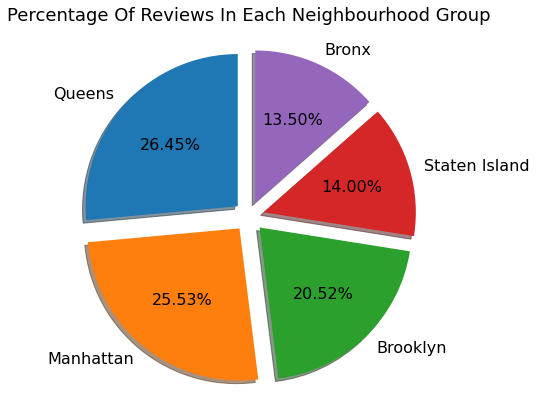

In [ ]:
# Plotting pie chart for number of reviews in each neighbourhood group
plt.figure(figsize=(10,7))
reviews = ng_reviews['number_of_reviews']
plt.pie(reviews, labels = ng_reviews['neighbourhood_group'], autopct = '%0.2f%%', startangle = 90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True, textprops={'fontsize': 16})
plt.title('Percentage Of Reviews In Each Neighbourhood Group', fontsize = 18)
plt.show()

# The above pie chart shows the share percentage of reviews for each neighbourhood group. More than **50%** of reviews are from **Queens** and **Manhattan**. Even though we saw the number of listings of Queens were less then half compared to Manhattan or Brooklyn, **Queens** has the most reviews than any another neighbourhood group. This shows that **Queens** is most likely to preferred by people.

## * Which hosts are the busiest and why?


In [ ]:
# Exploring neighbourhood group busiest hosts
busiest_hosts = data.groupby(['host_name','neighbourhood','neighbourhood_group'], sort=True)['host_id'].count().sort_values(ascending=False).head(10)
busiest_hosts.sort_values(inplace = True)
busiest_hosts

host_name     neighbourhood       neighbourhood_group
Melissa       Bedford-Stuyvesant  Brooklyn                39
Michael       Williamsburg        Brooklyn                41
Kara          Hell's Kitchen      Manhattan               41
Red Awning    Midtown             Manhattan               49
Stanley       Murray Hill         Manhattan               50
Sonder (NYC)  Murray Hill         Manhattan               50
Sonder        Financial District  Manhattan               51
Vida          Greenpoint          Brooklyn                52
John          Hell's Kitchen      Manhattan               55
Sonder (NYC)  Financial District  Manhattan              218
Name: host_id, dtype: int64

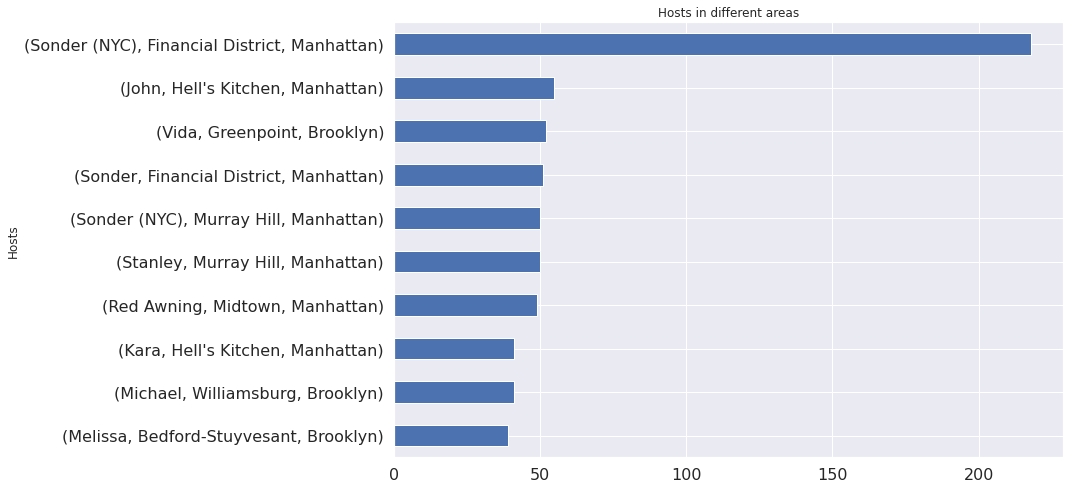

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Hosts in different areas")
busiest_hosts.plot(kind='barh', fontsize = 16, xlabel = 'Hosts', ylabel = 'Count')

# These are the top 10 busiest host among their respective neighbourhoods. **Financial District** is the busiest among all neighbourhood groups. Most busiest hosts are from **Manhattan** region.

# *What types of rooms are prefered by people respective to the regions?

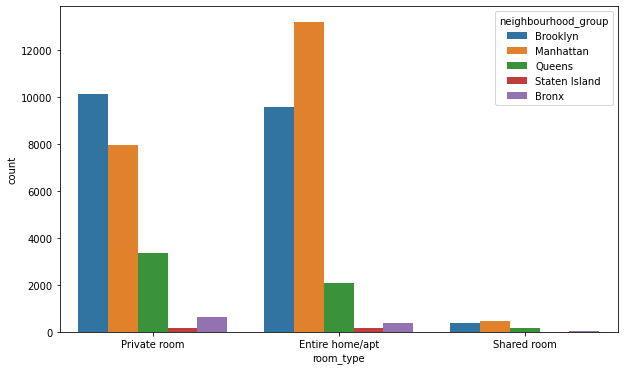

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'room_type', hue = 'neighbourhood_group')

# **Home service** seems to be most used by people and the highest in **Manhattan**. This is also the highest service used across New York City.

# In **Queens**, **Private rooms** were more used.

# *How room types are distributed among neighbourhood groups?

Text(0.5, 1.0, 'Location Co-ordinates')

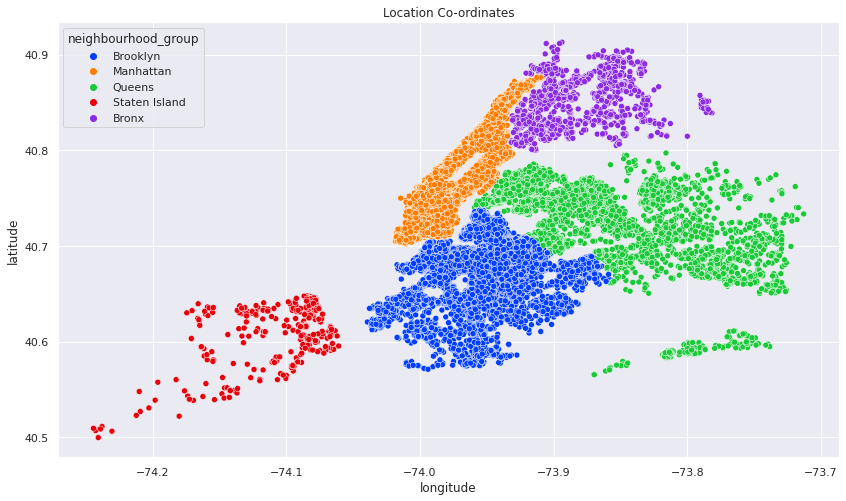

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(data=data, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC coordinates')

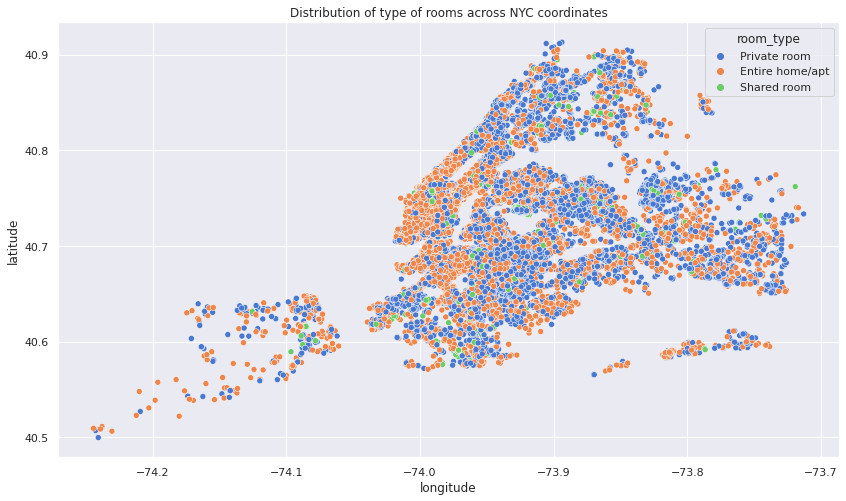

In [ ]:
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(x=data.longitude, y=data.latitude,hue=data.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC coordinates')

# By the above scatterplot of latitude vs longitude we can conclude that there's **Shared Room** listings throughout NYC are very less as compared to Private and Entire Home.
# **90%** of the listings on Airbnb are either **Private Room** or **Entire/Home**. Guests mostly have opted for **Private Room/Entire Room** as it's much easier for guests to stay in and rent on Airbnb.

# *What kind of distribution of available rooms throughout the year?

Text(0.5, 1.0, 'Rooms available throughout the year')

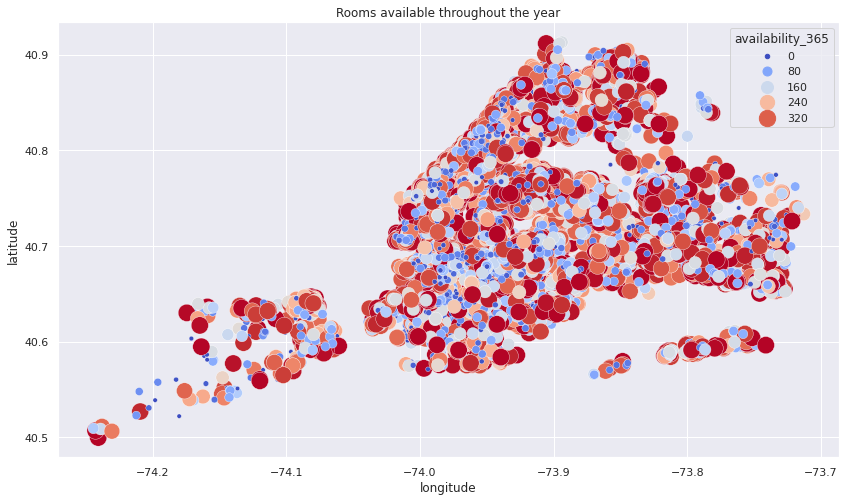

In [ ]:
plt.figure(figsize=(14, 8))
ax=sns.scatterplot(data=data,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365',sizes=(20,300))
ax.set_title('Rooms available throughout the year')

# As we discussed in previous analysis that **Bronx** and **Staten Island** listings are way **cheaper** than compared to others like **Manhattan** and **Queen**.

# The reason behind this can be explained through this scatterplot map.

# As you can see that **Staten Island** and **Bronx** listings are available throughout the year, now this might be case that they are way cheaper than other neighbourhood groups.

#  Conclusion - 

# 1.	Entire home/apt is highly expensive.
# 2. Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NYC.
# 3.	Bronx has most number of cheap rooms.
# 4.	Manhattan have highest no. of listing.
# 5.	In Manhattan entire home is mostly preferred but in Brooklyn ratio between entire home and private room is 50:50.
# 6.	Sonder have maximum property in New York.
# 7. Most visitors don’t prefer shared rooms, they tend to visit private room or entire home.
# 8. Though location of property has high relation on deciding its price, but a property in popular location doesn’t mean it will stay occupied in most of the time.
